In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
df = pd.read_csv("homeprices.csv")

In [5]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


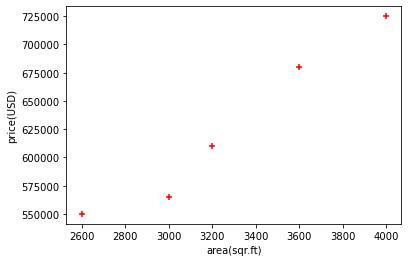

In [6]:
%matplotlib inline
plt.xlabel('area(sqr.ft)')
plt.ylabel('price(USD)')
plt.scatter(df.area, df.price, color = 'red', marker = '+')

In [7]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [8]:
reg.predict(df[['area']])

array([533664.38356164, 587979.45205479, 615136.98630137, 669452.05479452,
       723767.12328767])

In [9]:
reg.coef_

array([135.78767123])

In [11]:
reg.intercept_

180616.43835616432

In [13]:
# y=mx+b

In [14]:
price = reg.coef_*3300 + reg.intercept_

In [20]:
price

array([628715.75342466])

In [21]:
df1 = pd.read_excel("areas.xlsx")

In [25]:
p = reg.predict(df1[['areas']])

C:\Users\635746\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- areas
Feature names seen at fit time, yet now missing:
- area

  warnings.warn(message, FutureWarning)


In [26]:
df1['prices'] = p

In [27]:
df1.head()

,areas,prices
0,3300,6.287158e+05
1,3456,6.498986e+05
2,7600,1.212603e+06
3,6540,1.068668e+06
4,7985,1.264881e+06


In [28]:
df1.to_csv("housepricepreds.csv",index=False)

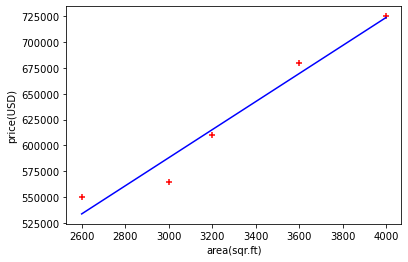

In [29]:
%matplotlib inline
plt.xlabel('area(sqr.ft)')
plt.ylabel('price(USD)')
plt.scatter(df.area, df.price, color = 'red', marker = '+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

In [30]:
import pickle

In [31]:
with open ('modelpicklefile', 'wb') as f:
    pickle.dump(reg, f)

In [32]:
with open('modelpicklefile', 'rb') as f:
    mp = pickle.load(f)

In [35]:
mp.predict([[3300]])

C:\Users\635746\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])